<a href="https://colab.research.google.com/github/shashank2806/cheetah-leopard-jaguar/blob/master/cheetah_leopard_jaguar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cheetah, Leopard or Jaguar?

In this notebook we will do Image Classisfiacion to identify cheetah, leopard, or jaguar. This notebook is inspired by lesson1 and lesson2 of third course by [fastai](https://www.fast.ai).

We will use Deep-Learning to classify which has gave state of art results in Image classification in recent years.

We will make our own dataset in this notebook using google images and use tranfer learning to get more accurate results with less dataset.

The main difference between these images in slightly difference in pattern on  their body, and I hope machine learning model to learn to identify these patterns.

We will use fastai library, whch is based on PyTorch for this project.

In [0]:
from fastai import *
from fastai.vision import *

## Preparing dataset

### Downloading Images from Google Images

Go to Google Images and search for Images you are intrested in, in this case images of Cheetah, Leopard and Jaguar. Use some extension to download URLs of all images inn a file and upload that file to server.



In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving jaguar.txt to jaguar.txt
Saving leopard.txt to leopard.txt
Saving cheetah.txt to cheetah.txt
User uploaded file "jaguar.txt" with length 34593 bytes
User uploaded file "leopard.txt" with length 35094 bytes
User uploaded file "cheetah.txt" with length 36974 bytes


### Create a directory

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [0]:
folder = 'cheetah'
file1 = 'cheetah.txt'

In [0]:
folder = 'leopard'
file2 = 'leopard.txt'

In [0]:
folder = 'jaguar'
file3 = 'jaguar.txt'

You will neddd to run this cell for each category

In [0]:
# make directory for downloading images of each classes from URLs
path = Path('data/big_cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/big_cats/cheetah'),
 PosixPath('data/big_cats/leopard'),
 PosixPath('data/big_cats/jaguar')]

## Download images

Now to download the images from their respective urls.

fast.ai has a function that allows us to specify the urls filename and the destination folder and which then downloads and saves all images that can be opened. If they have some problem in being opened, they will not be saved.



In [0]:
classes = ['cheetah', 'leopard', 'jaguar']

In [0]:
# cheetah
dest = Path('data/big_cats/cheetah')
download_images(file1, dest, max_pics=350)

Error https://dictionary.cambridge.org/images/thumb/cheeta_noun_002_06491.jpg?version ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.animalfactsencyclopedia.com/images/cheetahrun605.jpg HTTPSConnectionPool(host='www.animalfactsencyclopedia.com', port=443): Max retries exceeded with url: /images/cheetahrun605.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fdac0333c50>, 'Connection to www.animalfactsencyclopedia.com timed out. (connect timeout=4)'))


In [0]:
# leopard
dest = Path('data/big_cats/leopard')
download_images(file2, dest, max_pics=350)

Error https://media.mehrnews.com/d/2018/03/18/4/2744865.jpg HTTPSConnectionPool(host='media.mehrnews.com', port=443): Max retries exceeded with url: /d/2018/03/18/4/2744865.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fdac02e8198>, 'Connection to media.mehrnews.com timed out. (connect timeout=4)'))
Error http://dougal.union.ic.ac.uk/media/iscience/wp-content/uploads/2011/05/Zanzibar_Leopard2-383x300.jpg HTTPSConnectionPool(host='dougal.union.ic.ac.uk', port=443): Max retries exceeded with url: /media/iscience/wp-content/uploads/2011/05/Zanzibar_Leopard2-383x300.jpg (Caused by SSLError(CertificateError("hostname 'dougal.union.ic.ac.uk' doesn't match either of 'union.ic.ac.uk', 'www.union.ic.ac.uk'",),))
Error https://www.telegraph.co.uk/content/dam/news/2018/05/07/162548254_Robert-Harding-World-Imagery_Leopard-in-Ugandas-Murchison-Falls-National-Park-Uganda-A_trans_NvBQzQNjv4BqgsaO8O78rhmZrDxTlQBjdEbgHFEZVI1Pljic_pW9c90.jpg?imwidth\u003d450

In [0]:
# jaguar
dest = Path('data/big_cats/jaguar')
download_images(file3, dest, max_pics=350)

Error https://img.washingtonpost.com/wp-apps/imrs.php?src\u003dhttps://img.washingtonpost.com/rf/image_960w/2010-2019/Wires/Images/2016-12-07/AP/Wild_Jaguar-Photo-7ca1d.jpg\u0026w\u003d1484 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://cdn.avopix.com/photos/detail/d_124573_big-cat-jaguar-feline.jpg HTTPSConnectionPool(host='cdn.avopix.com', port=443): Max retries exceeded with url: /photos/detail/d_124573_big-cat-jaguar-feline.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://wallpaper-house.com/data/out/10/wallpaper2you_420185.jpg HTTPSConnectionPool(host='wallpapers-house.com', port=443): Read timed out. (read timeout=4)


Some images are curropted while downloading, we have to remove them

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

cheetah


cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000125.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000222.jpg'>
Image data/big_cats/cheetah/00000065.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000102.jpeg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000310.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000316.jpeg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000306.jpg'>
Image data/big_cats/cheetah/00000141.png has 4 instead of 3 channels
Image data/big_cats/cheetah/00000320.png has 4 instead of 3 channels
Image data/big_cats/cheetah/00000057.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/cheetah/00000021.jpg'>
Im

cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000257.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000121.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000157.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000330.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000343.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000224.jpg'>
Image data/big_cats/leopard/00000086.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000241.jpeg'>
Image data/big_cats/leopard/00000097.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/leopard/00000193.jpg'>
Image data/big_cats/leopard/00000304.png has 4 inst

cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000321.jpg'>
Image data/big_cats/jaguar/00000272.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000205.jpg'>
Image data/big_cats/jaguar/00000259.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000270.jpg'>
Image data/big_cats/jaguar/00000009.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000132.jpg'>
cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000066.jpg'>
Image data/big_cats/jaguar/00000178.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000283.jpg'>
Image data/big_cats/jaguar/00000193.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/big_cats/jaguar/00000058.jpg'>
cannot identify image file <_io.Buffe

## View data

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                 num_workers=4).normalize(imagenet_stats)

Lets look at some our pictures

In [0]:
data.classes

['cheetah', 'jaguar', 'leopard']

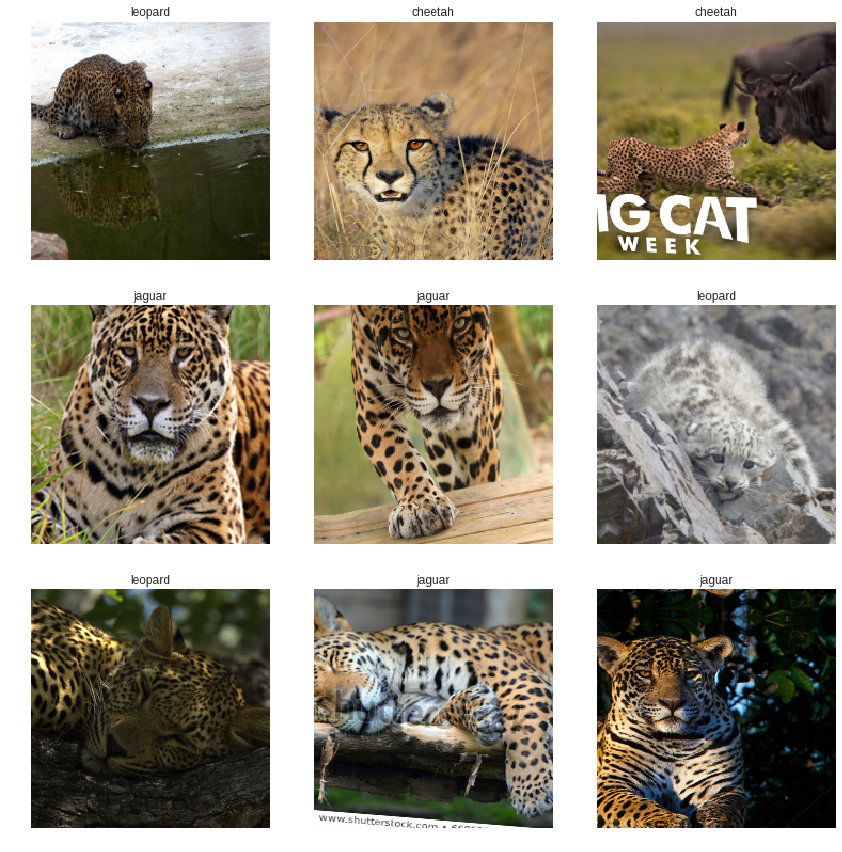

In [0]:
data.show_batch(rows=3)

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard'], 3, 768, 192)

## Train model

In [5]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

NameError: ignored

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.043290,0.360778,0.156250
2,0.713012,0.312497,0.109375
3,0.574332,0.302433,0.130208
4,0.492556,0.300767,0.151042


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


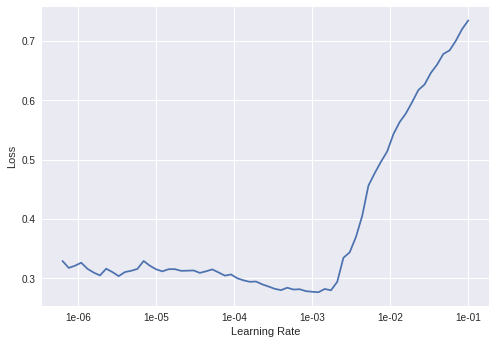

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-04, 3e-04))

epoch,train_loss,valid_loss,error_rate
1,0.337370,0.308548,0.135417
2,0.306155,0.240717,0.078125


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-04, 3e-04))

epoch,train_loss,valid_loss,error_rate
1,0.047389,0.411452,0.145833
2,0.076503,0.393000,0.119792
3,0.083695,0.359981,0.119792


## Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (768 items)
[Category cheetah, Category cheetah, Category cheetah, Category cheetah, Category cheetah]...
Path: data/big_cats
x: ImageItemList (768 items)
[Image (3, 200, 300), Image (3, 655, 1024), Image (3, 349, 524), Image (3, 436, 656), Image (3, 421, 750)]...
Path: data/big_cats;

Valid: LabelList
y: CategoryList (192 items)
[Category jaguar, Category cheetah, Category cheetah, Category jaguar, Category jaguar]...
Path: data/big_cats
x: ImageItemList (192 items)
[Image (3, 313, 500), Image (3, 358, 636), Image (3, 328, 512), Image (3, 768, 1150), Image (3, 720, 1280)]...
Path: data/big_cats;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

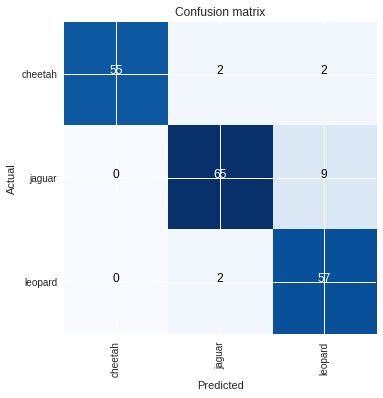

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('jaguar', 'leopard', 9),
 ('cheetah', 'jaguar', 2),
 ('cheetah', 'leopard', 2),
 ('leopard', 'jaguar', 2)]

Sum losses are not due to bad performance of our model, but due to images in our dataset which should not be there.(maybe there is image of jaguar cars!!!)

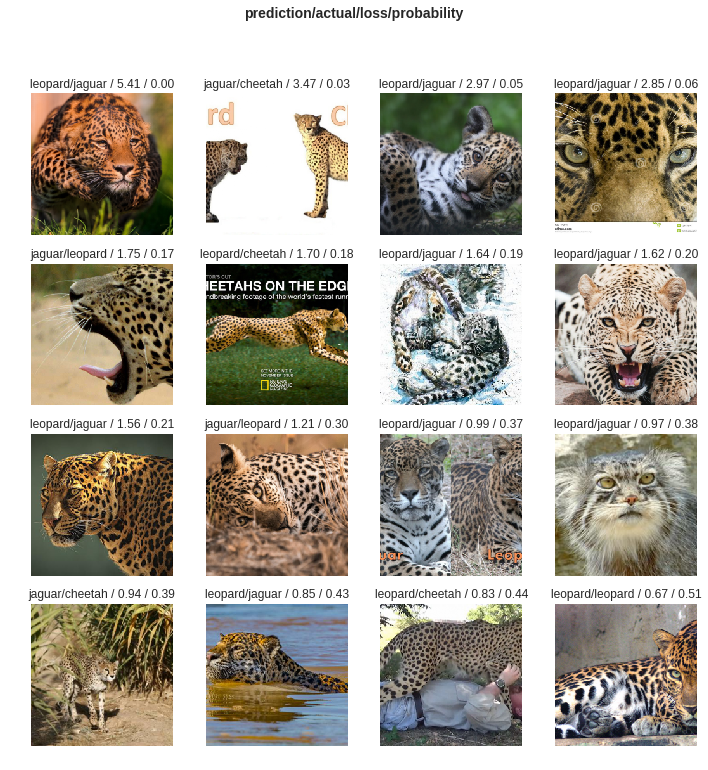

In [0]:
interp.plot_top_losses(16)

### save model to drive


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cp data/big_cats/models/stage-2.pth /gdrive/"My Drive"/cheetah.pth

##Putting model to Production


First thing first, let's export the content of our Learner object for production

In [0]:
learn.export()



This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).


You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

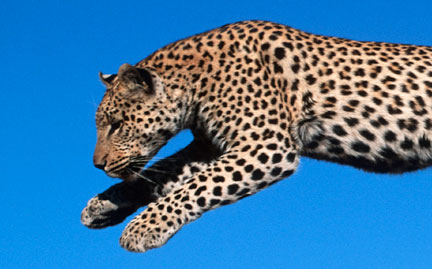

In [0]:
img = open_image(path/'leopard'/'00000021.jpg')
img

We create our Learner in production enviromnent like this, just make sure that path contains the file 'export.pkl' from before.

In [0]:
path = 'data/big_cats/'
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category leopard

Now we are to put this model in production

In [0]:
!cp /content/data/big_cats/export.pkl /gdrive/"My Drive"/

We should also save the dataset we prepared so that we don't have to make dataset again from scratch.

We will save compress images and save them

In [0]:
# remove saved models and export file
!rm -r data/big_cats/models
!rm data/big_cats/export.pkl

In [0]:
#  tar data
! tar czf big_cats.tar.gz data/big_cats

In [0]:
!cp big_cats.tar.gz /gdrive/"My Drive"/

# Load exported model from drive

In [21]:
!wget 'https://drive.google.com/uc?export=download&id=1-7lcKZ0rxQScHEsQecnaSZwGV_pQEEVT'

--2019-02-10 22:00:34--  https://drive.google.com/uc?export=download&id=1-7lcKZ0rxQScHEsQecnaSZwGV_pQEEVT
Resolving drive.google.com (drive.google.com)... 74.125.132.139, 74.125.132.102, 74.125.132.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g14pecag4loqg6d50k7135t8juoh9076/1549836000000/13065203240891853936/*/1-7lcKZ0rxQScHEsQecnaSZwGV_pQEEVT?e=download [following]
--2019-02-10 22:00:53--  https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g14pecag4loqg6d50k7135t8juoh9076/1549836000000/13065203240891853936/*/1-7lcKZ0rxQScHEsQecnaSZwGV_pQEEVT?e=download
Resolving doc-0o-c4-docs.googleusercontent.com (doc-0o-c4-docs.googleusercontent.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to doc-0o-c4-docs.googleusercontent.com (doc-0o

In [0]:
learn = load_learner('/content/', 'uc?export=download&id=1-7lcKZ0rxQScHEsQecnaSZwGV_pQEEVT')

In [41]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving boat.JPG to boat.JPG
User uploaded file "boat.JPG" with length 126057 bytes


In [0]:
img = open_image('boat.JPG')
img

In [43]:
list(map(int, (learn.predict(img)[2])*100))

[2, 88, 8]